# Data visualization

## Exploratory data analysis

The goals are to understand:
* the statistics and characteristics of the sample and of the population
* patterns within the data
* relations within the variables of the data.

## Univariate data

* sample vs population

## Categorical data

* tabular analysis of frequency

<img src="https://miro.medium.com/max/1044/1*g3RFKtbpbCY8HaM2eEpGTA.png" width="50%">

## Quantitative data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [109]:
data = pd.read_csv('data.csv')

In [110]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr'],
      dtype='object')

In [111]:
univar = data['RSSI']

### Histogram

* representation of the sample distribution

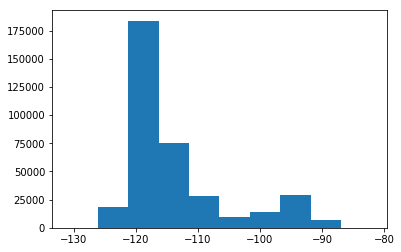

In [112]:
_ = plt.hist(univar)

### Histogram bins: width and number

* the bin width acts as a smoothing factor for the distribution

Text(0.5, 1.0, 'Bin width=10 units')

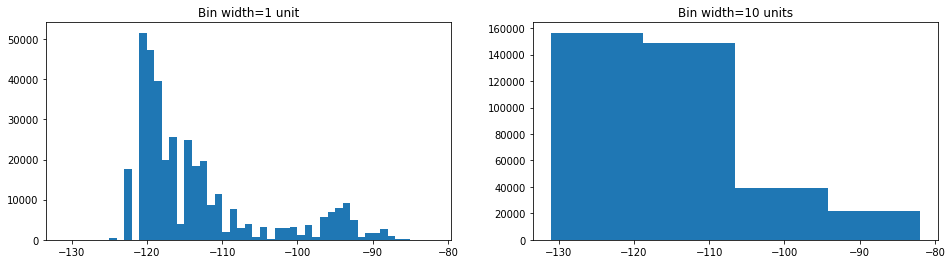

In [113]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.title('Bin width=1 unit')
plt.subplot(1,2,2)
plt.hist(univar, bins=int((univar.max()-univar.min())/10))
plt.title('Bin width=10 units')

### Histogram bins: Scott's normal reference rule

* histograms are a discrete approximation of the continuous distribution
* as the number of samples $\to \infty$ the histogram should show the continuous distribution
* Scott's rule selects the bin width to minimize the difference between the histogram and the density estimate

$h = \frac{3.5\sigma}{\sqrt[3]{n}}$

In [114]:
binwidth = 3.5*np.std(univar)/np.power(len(univar), 1/3)
binwidth

0.42836822855843726

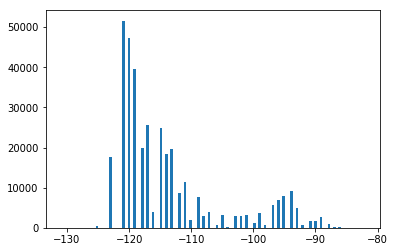

In [115]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())/binwidth))

* What's happening?
* Scott's rule is designed for __normally__ distributed data
* there are other bin width selection rules for non-normal data.

### Mean

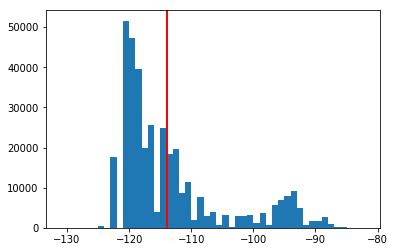

In [116]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)

### Median

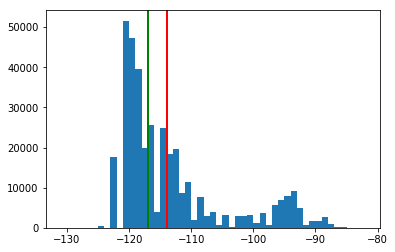

In [117]:
_ = plt.hist(univar, bins=int((univar.max()-univar.min())))
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.axvline(np.median(univar), color='green', linewidth=2)

### Robustness

* a statistic is robust if moving some of the data will not affect the statistic

### The median is robust

-117.0 -114.0


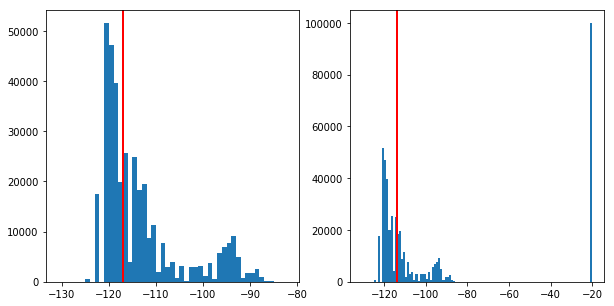

In [118]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.median(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.median(univar_copy), color='red', linewidth=2)
print(np.median(univar), np.median(univar_copy))

### The mean is not robust

-113.88155672052767 -93.75417473313652


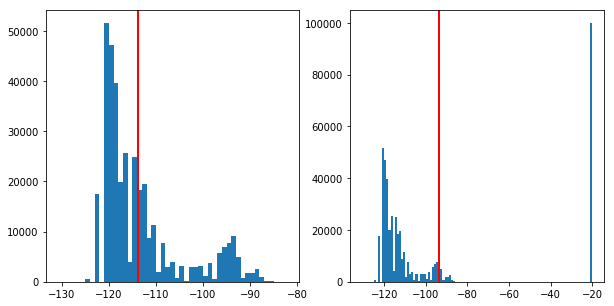

In [119]:
univar_copy = list(univar)
univar_copy.extend([-20]*100000)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(univar, bins=univar.max()-univar.min())
plt.axvline(np.mean(univar), color='red', linewidth=2)
plt.subplot(1,2,2)
plt.hist(univar_copy, bins=max(univar_copy)-min(univar_copy))
plt.axvline(np.mean(univar_copy), color='red', linewidth=2)
print(np.mean(univar), np.mean(univar_copy))

### Box and whiskers plot

![Box and whiskers](https://publiclab.org/system/images/photos/000/032/980/original/Screen_Shot_2019-06-18_at_10.27.45_AM.png)

### Box and whiskers plot, what does it show?

Properties of the distribution
* spread (Inter-Quartile Range)
* skewness
* kurtosis
* tails (heavy left-right)

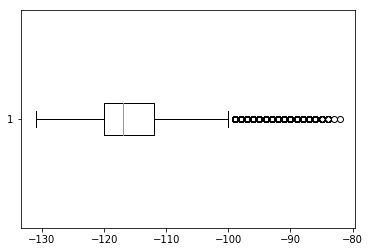

In [120]:
_=plt.boxplot(univar, vert=False)

The whiskers are placed by default at $Q_1-1.5IQR$ and $Q_2+1.5IQR$. They can be changed for example to reflect the $[5,95]$ percentile interval

Anything outside these values is considered outlier.

### Quantile-quantile plot

Analysis of the normality of the data.

<img width=50% src="https://www.mathworks.com/help/examples/stats/win64/QuantileQuantilePlotForNormalDistributionExample_01.png">

How it works:
* plot the data against a normal distribution with the same mean and std dev
* if the data is normal there will be a linear correlation.

### Q-Q plot: normally distributed data

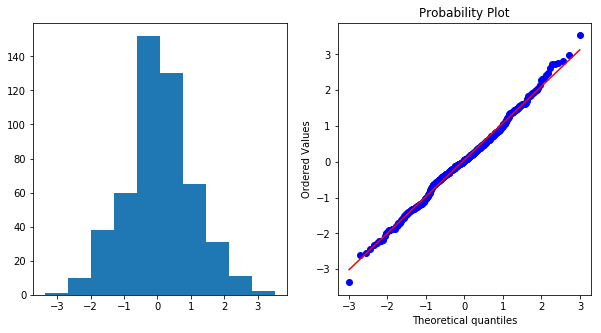

In [121]:
import scipy.stats as stats

seq1 = np.random.normal(0, 1, 500)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq1)
plt.subplot(1,2,2)
_=stats.probplot(seq1, dist="norm", plot=plt)

### Q-Q plot: right skewed normal distribution

* distribution has a long __right__ tail
* also known as __positive__ skew

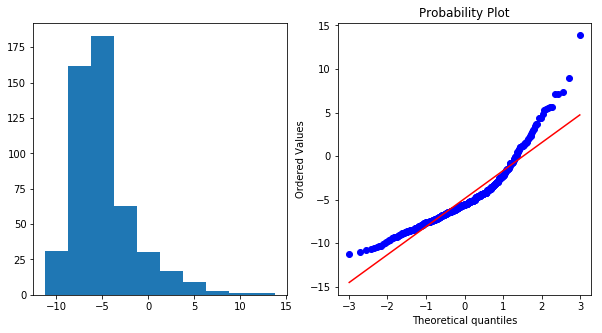

In [122]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(-6,2, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: left skewed normal distribution

* distribution has a long __left__ tail
* also known as __negative__ skew

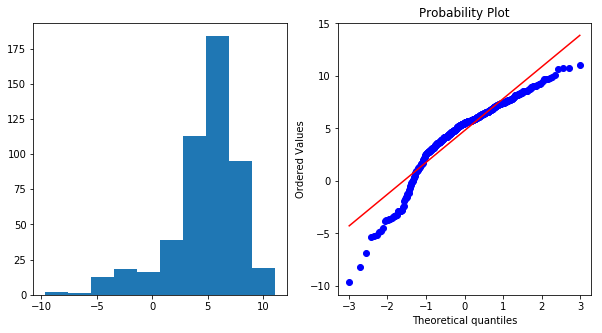

In [123]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(6,2,400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Q-Q plot: kurtosis

* leptokurtic distribution
* also known as positive excess kurtosis

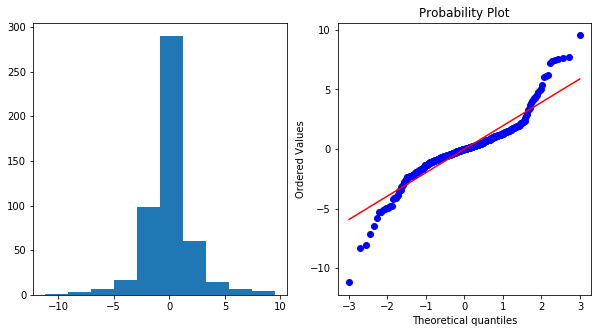

In [124]:
import scipy.stats as stats

seq1 = np.random.normal(0, 4, 100)
seq2 = np.random.normal(0, 1, 400)
seq3 = np.concatenate((seq1, seq2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(seq3)
plt.subplot(1,2,2)
_=stats.probplot(seq3, dist="norm", plot=plt)

### Data scale and changing the scale

* sometimes the data is polarized between a few very large values and lots of small values

In [125]:
from datetime import datetime
data['timestamps'] = data['UTC timestamp'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%fZ").timestamp())

ipi = np.diff(data['timestamps'])

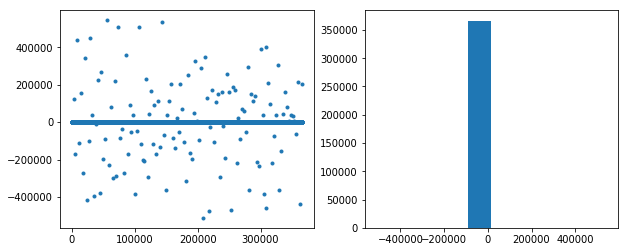

In [126]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ipi, '.')
plt.subplot(1,2,2)
_=plt.hist(ipi)

### Data scale and changing the scale

* in these cases it's useful to change the scale to logarithmic
* this will clearly show the distribution of the data

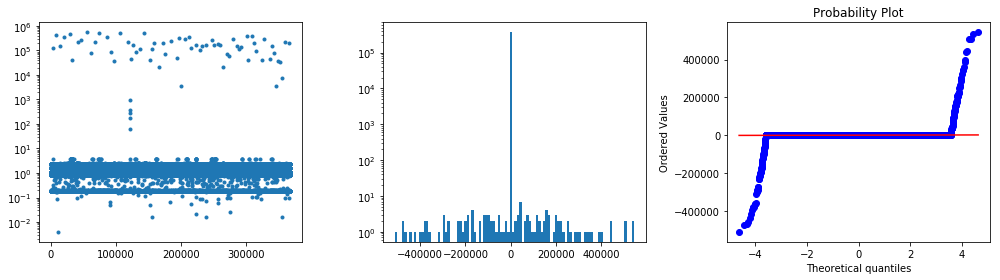

In [127]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.plot(ipi, '.')
plt.yscale('log')
plt.subplot(1,3,2)
_=plt.hist(ipi, bins=100)
plt.yscale('log')
plt.subplot(1,3,3)
_=stats.probplot(ipi, dist='norm', plot=plt)
plt.tight_layout()

# Multivariate data

In [128]:
data.columns

Index(['Unnamed: 0', 'UTC timestamp', 'us count', 'frequency', 'status',
       'size', 'datarate', 'coderate', 'RSSI', 'SNR', 'SNRMIN', 'SNRMAX',
       'payload', 'pld-hdr', 'timestamps'],
      dtype='object')

In [129]:
data['status'].value_counts()

CRC_OK     357648
CRC_BAD      8789
Name: status, dtype: int64

In [130]:
data['datarate'].value_counts()

SF12      74222
SF10      74121
SF9       73965
SF8       73138
SF7       70991
Name: datarate, dtype: int64

### Categorical data: frequency analysis

In [131]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate']})

In [132]:
cat_data.groupby(["datarate", "status"]).size()

datarate  status 
SF10      CRC_BAD      520
          CRC_OK     73601
SF12      CRC_OK     74222
SF7       CRC_BAD     4372
          CRC_OK     66619
SF8       CRC_BAD     2741
          CRC_OK     70397
SF9       CRC_BAD     1156
          CRC_OK     72809
dtype: int64

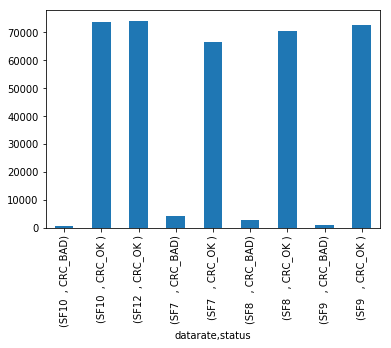

In [133]:
cat_data.groupby(["datarate", "status"]).size().plot.bar()

### Ordinal and mixed data

In [134]:
cat_data = pd.DataFrame({'status': data['status'], 'datarate': data['datarate'], 'snr':data['SNR']})

In [135]:
cat_data.groupby(["datarate", "status"]).describe()

snr                                                   
                    count       mean       std   min   25%   50%   75%   max
datarate status                                                             
SF10     CRC_BAD    520.0  -6.436154  8.040878 -19.2 -14.5  -5.8   1.2   8.2
         CRC_OK   73601.0   0.798334  5.550742 -16.8  -3.0   2.0   5.2  11.0
SF12     CRC_OK   74222.0   6.766277  0.888280  -8.2   6.2   6.8   7.2  10.8
SF7      CRC_BAD   4372.0  -8.410064  2.479495 -14.8  -9.8  -8.8  -7.8   5.5
         CRC_OK   66619.0   1.367008  4.274566 -10.2  -2.0   2.0   4.8   9.8
SF8      CRC_BAD   2741.0 -10.304633  3.787215 -16.8 -12.0 -11.5 -10.5   7.5
         CRC_OK   70397.0   1.391737  5.078246 -12.2  -2.5   2.2   5.5  11.0
SF9      CRC_BAD   1156.0  -9.650173  6.233625 -17.0 -13.8 -13.0  -5.5   7.5
         CRC_OK   72809.0   1.197676  5.634897 -15.8  -3.0   2.2   5.8  12.2

### Mosaic plot

<img src="https://miro.medium.com/max/1636/1*HQ-9olYMSoy-MA2eHQFO7w.png" width=50%/>

* useful for understanding relations and levels for categorical and mixed data
* available in Python through the __statsmodel__ module

### Cross-tabulation

In [136]:
pd.crosstab(data['status'], [data['datarate'], data['SNR'].apply(lambda x: int(x/10))], normalize='columns')

datarate    SF10                  SF12           SF7                 SF8     \
SNR             -1         0    1      0    1        -1         0        -1   
status                                                                        
CRC_BAD   0.049012  0.004633  0.0    0.0  0.0  0.996629  0.049714  0.769334   
CRC_OK    0.950988  0.995367  1.0    1.0  1.0  0.003371  0.950286  0.230666   

datarate                   SF9                    
SNR              0    1        -1         0    1  
status                                            
CRC_BAD   0.006487  0.0  0.205588  0.005423  0.0  
CRC_OK    0.993513  1.0  0.794412  0.994577  1.0

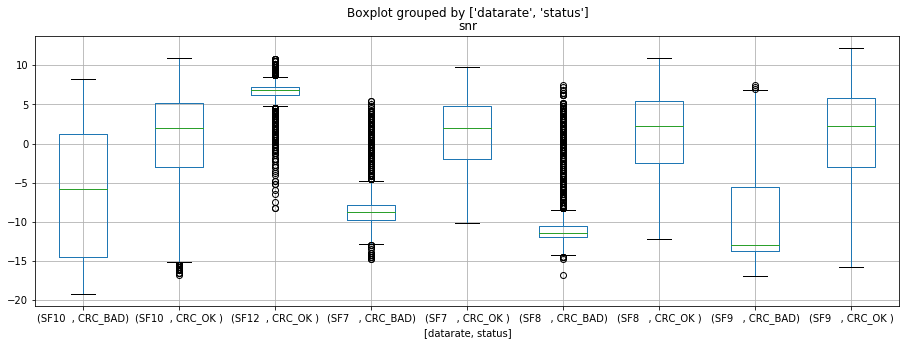

In [137]:
_=cat_data.boxplot(by=['datarate', 'status'], figsize=(15,5))

In [138]:
data['SF'] = data['datarate'].apply(lambda x: int(x.strip()[2:]))
data['status'] = data['status'].apply(lambda x: x.strip())

In [139]:
crc_ok = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_OK')] for d in np.unique(data['SF'].values)]
crc_bad = [data['SNR'][(data['SF']==d) & (data['status']=='CRC_BAD')] for d in np.unique(data['SF'].values)]

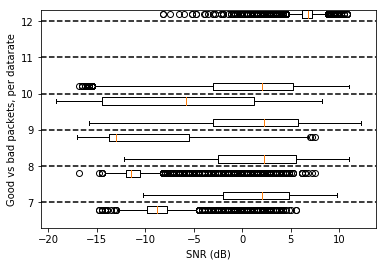

In [140]:
_=plt.boxplot(crc_ok, vert=False, positions=[d+0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
_=plt.boxplot(crc_bad, vert=False, positions=[d-0.2 for d in np.unique(data['SF'].values)], widths=[0.2]*len(np.unique(data['SF'].values)))
plt.xlabel('SNR (dB)')
plt.ylabel('Good vs bad packets, per datarate')
_=plt.yticks([7,8,9,10,11,12], [7,8,9,10,11,12])
for d in range(7,13):
    plt.axhline(d, color='k', linestyle='--')

### Correlation: scatterplot

In [141]:
corr_data = pd.DataFrame({'rssi':data['RSSI'], 'snr':data['SNR']})

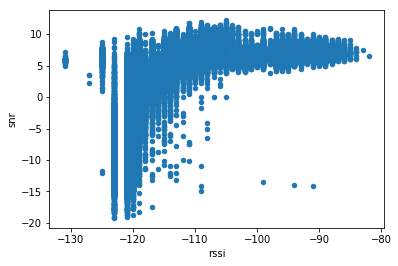

In [142]:
corr_data.plot.scatter(x='rssi', y='snr')

### Cross-correlation

In [143]:
iris_data = pd.read_csv('iris.csv')
iris_data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
corrplot = iris_data.corr()
corrplot.style.background_gradient(cmap='BrBG')

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1


# Timeseries data    

## What does it look like?

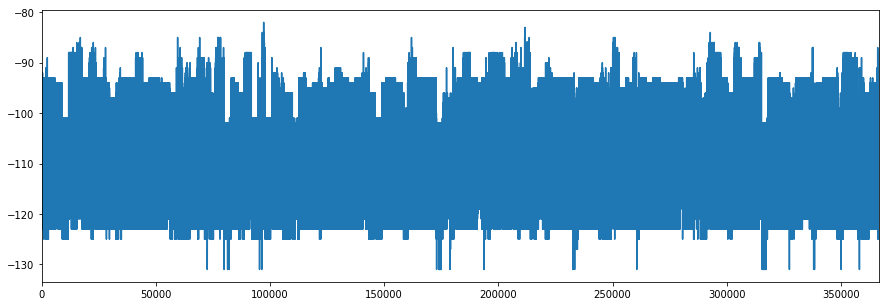

In [145]:
plt.figure(figsize=(15,5))
data['RSSI'].plot()

## Should plot based on time if available

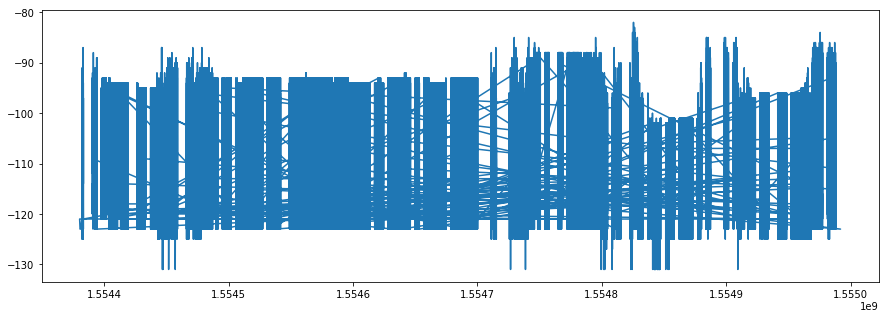

In [146]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'])

## Data should be sorted

In [147]:
data = data.sort_values(by=['timestamps'])

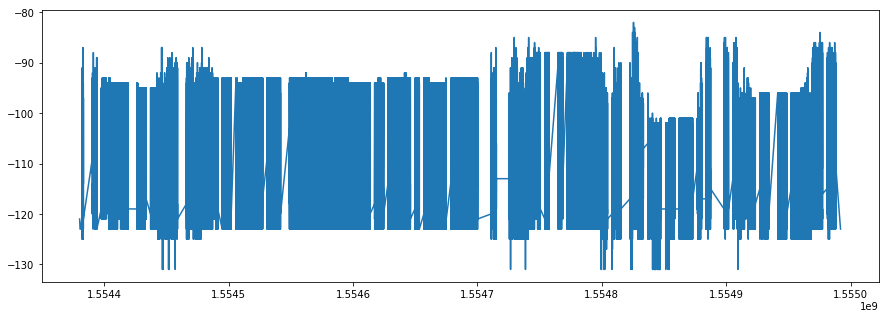

In [148]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'])

## Sometimes lines can hide important patterns

It's a good idea to plot with the smallest marker possible, no lines

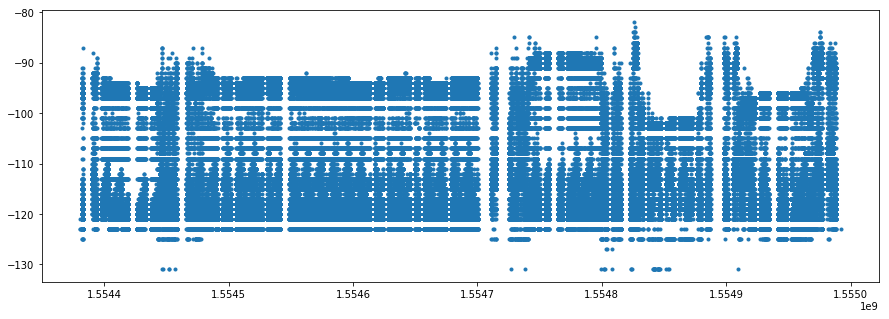

In [149]:
plt.figure(figsize=(15,5))
plt.plot(data['timestamps'], data['RSSI'], '.')

## Use a timestamp that makes sense

In [150]:
from datetime import datetime
data['datetime'] = data['UTC timestamp'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%fZ"))

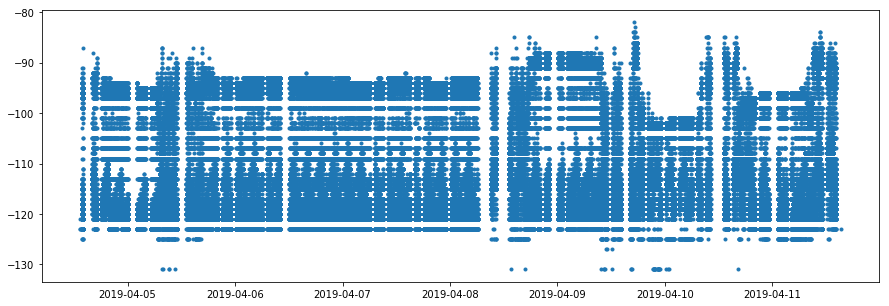

In [151]:
plt.figure(figsize=(15,5))
plt.plot(data['datetime'], data['RSSI'], '.')

## What is important in timeseries analysis?

Long or short term trends

Patterns

## Break it down into "seasons"

* what a season means depends on the data
* can be years, months, days, or even less than that.

In [152]:
data['day'] = data['datetime'].apply(lambda x: x.day)

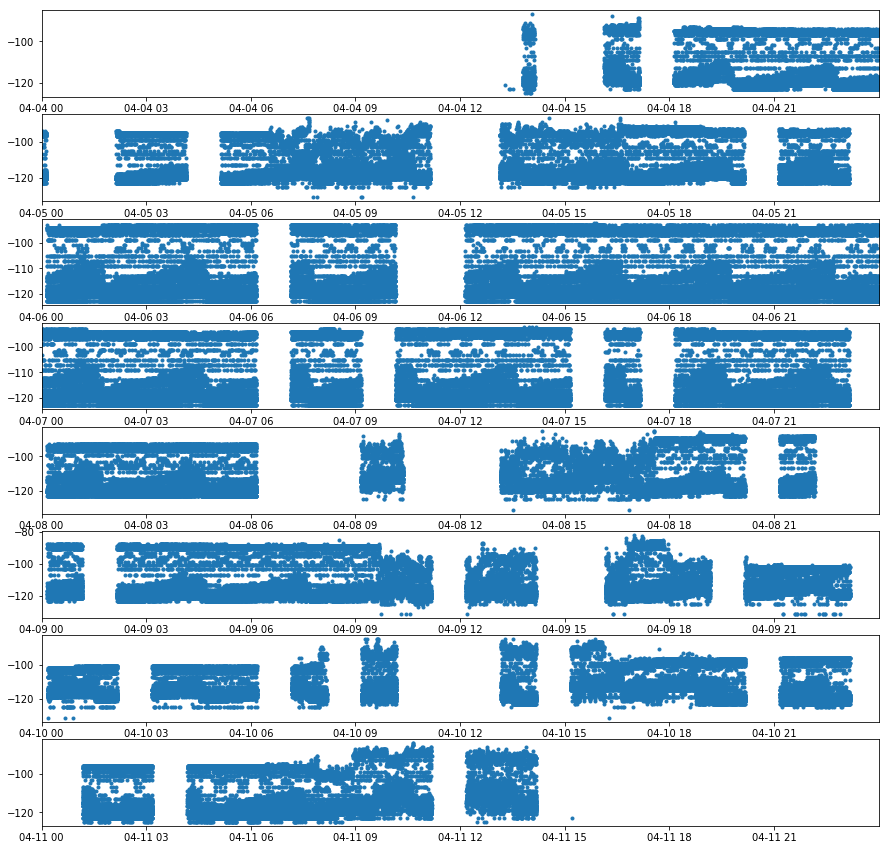

In [153]:
plt.figure(figsize=(15,15))
for day, group in data.groupby(['day']):
    plt.subplot(8,1,day-3)
    plt.plot(group['datetime'], group['RSSI'], '.')
    group_date = group['datetime'].min()
    day_start = datetime(group_date.year, group_date.month, group_date.day)
    day_end = datetime(group_date.year, group_date.month, group_date.day, hour=23, minute=59, second=59)
    plt.xlim([day_start, day_end])

### Let's try a different dataset

In [154]:
data = pd.read_csv('solar_data.csv')

In [155]:
data.columns

Index(['Datetime', 'Zenith', 'Azimuth', 'ETR', 'ETRN', 'GloMod', 'GloModUnc',
       'GloModSource', 'DirMod', 'DirModUnc', 'DirModSource', 'DifMod',
       'DifModUnc', 'DifModSource', 'MeasGlo', 'MeasGloFlg', 'MeasDir',
       'MeasDirFlg', 'MeasDif', 'MeasDifFlg', 'TotCC', 'PrecipWat',
       'PrecipWatFlg', 'AOD', 'AODFlg'],
      dtype='object')

In [156]:
data['MeasDir'] = data['MeasDir'].replace(-9900, None)

In [157]:
data['timestamp'] = data['Datetime'].apply(lambda s: datetime.strptime(s, "%Y-%m-%d-%H:%M"))

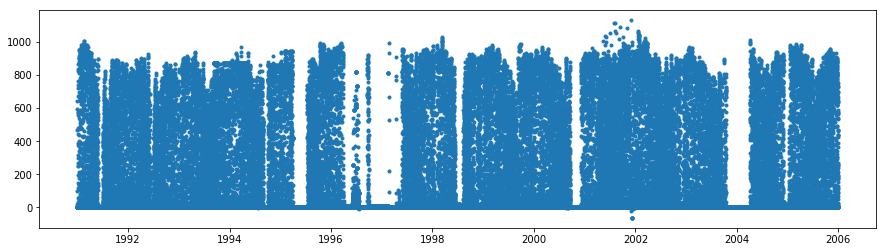

In [158]:
plt.figure(figsize=(15,4))
plt.plot(data['timestamp'], data['MeasDir'], '.')

## Break down into seasons

* year, month, and day

In [159]:
data['year'] = data['timestamp'].apply(lambda x:x.year)
data['month'] = data['timestamp'].apply(lambda x:x.month)
data['day'] = data['timestamp'].apply(lambda x:x.day)

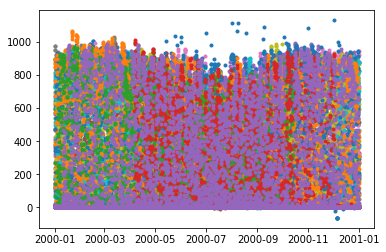

In [160]:
for year, gr in data.groupby(['year']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,x.month, x.day, x.hour)), gr['MeasDir'], '.')


### Plotting the data grouped over the days of the month shows the daily pattern

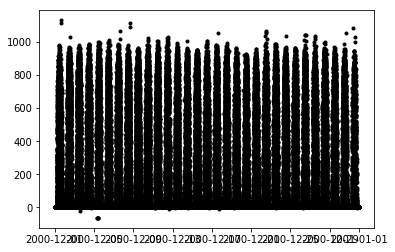

In [161]:
for month, gr in data.groupby(['month']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,12, x.day, x.hour)), gr['MeasDir'], 'k.')

### Plotting over the hours of the days confirms that pattern

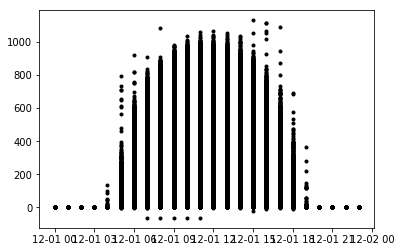

In [162]:
for day, gr in data.groupby(['day']):
    plt.plot(gr['timestamp'].apply(lambda x:datetime(2000,12, 1, x.hour)), gr['MeasDir'], 'k.')

### We can see seasonal variation if we plot the distribution for each month

#### As expected, more energy during the summer months, less during winter

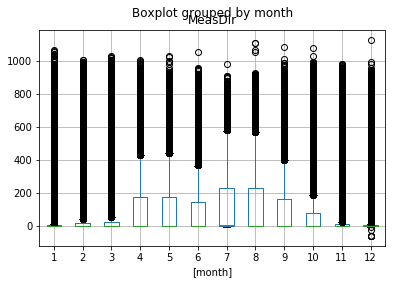

In [163]:
data.boxplot(column=['MeasDir'], by=['month'])

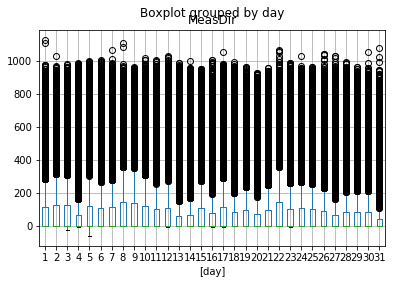

In [164]:
data.boxplot(column=['MeasDir'], by=['day'])

### Window smooting

In [165]:
_=data.set_index('timestamp', inplace=True)

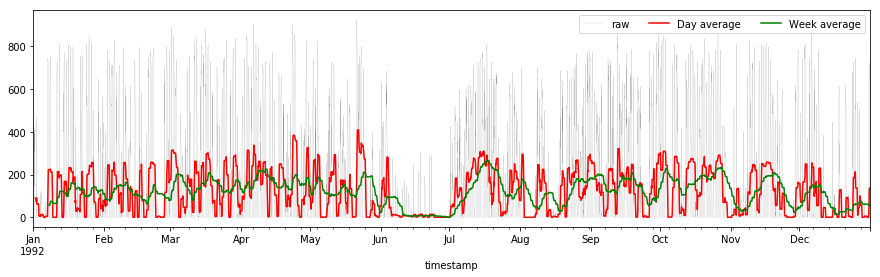

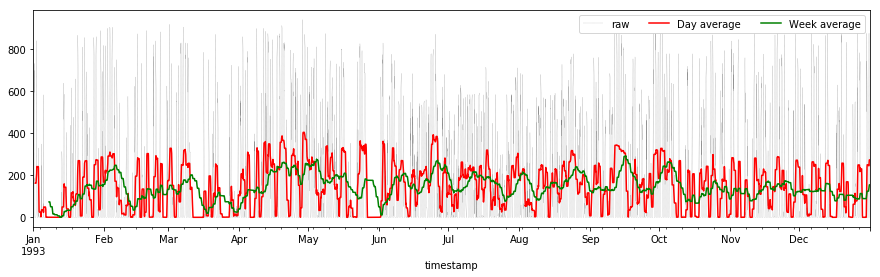

In [166]:
for year in range(1992,1994):
    plt.figure(figsize=(15,4))
    data['MeasDir'][data['year'] == year].plot(style='k--', linewidth=0.1, label='raw')
    day_means_rolling = data['MeasDir'][data['year'] == year].rolling(window=24)
    day_means_rolling.mean().plot(style='r-', label='Day average')
    day_means_rolling = data['MeasDir'][data['year'] == year].rolling(window=7*24)
    day_means_rolling.mean().plot(style='g-', label='Week average')
    plt.legend(ncol=3)

## Autocorrelation

Useful for identifying patterns in the data

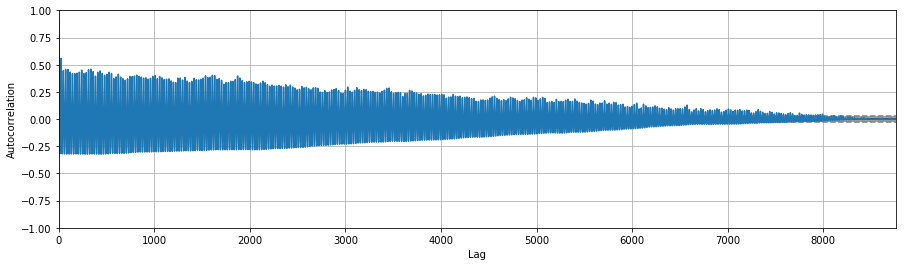

In [167]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['MeasDir'][data['year']==1993])

(1.0, 744)

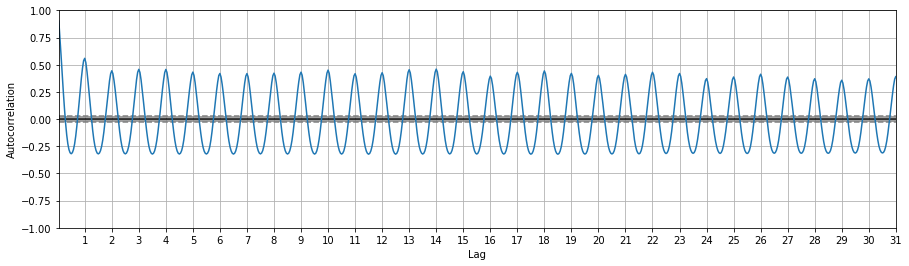

In [168]:
plt.figure(figsize=(15,4))
pd.plotting.autocorrelation_plot(data['MeasDir'][data['year']==1993])
_=plt.xticks([24*i for i in range(1,100)], range(1,100))
plt.xlim([None,31*24])

## Periodogram

Analyzes the spectrum of the data.

Useful for identifying patterns in the data.

In [169]:
from scipy.signal import periodogram

Max at 24.00h


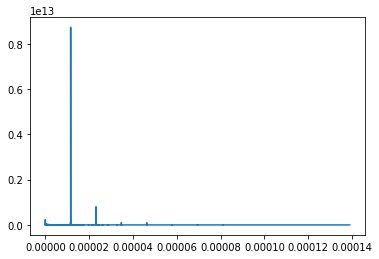

In [170]:
freq, powdens = periodogram(data['MeasDir'], fs=1/3600)
plt.plot(freq, powdens)
print('Max at %0.2fh'%((1/freq[powdens.argmax()])/3600))

## Trends in data

In [171]:
airline = pd.read_csv('airline-passengers.csv', index_col=0)
print(airline.head(10))

         Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121
1949-06         135
1949-07         148
1949-08         148
1949-09         136
1949-10         119


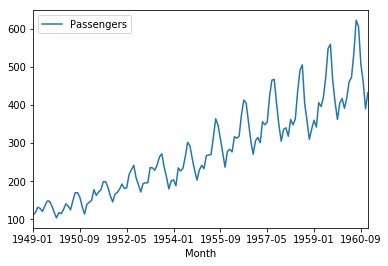

In [172]:
airline.plot()

### Smoothing again

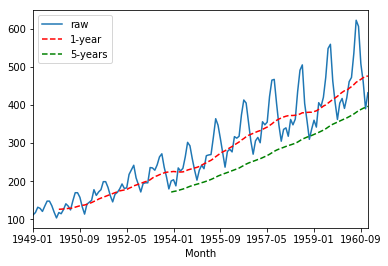

In [173]:
ax = airline.plot(legend=False)
yearly = airline.rolling(window=12)
five_yearly = airline.rolling(window=12*5)
yearly.mean().plot(ax=ax,style='r--', legend=False)
five_yearly.mean().plot(ax=ax,style='g--', legend=False)
ax.legend(['raw', '1-year', '5-years'])

## Seasonal decomposition of data

A timeseries can be decomposed as $y=\text{Trend}+\text{Seasonal}+\text{Residual}$

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [175]:
airline = pd.read_csv('airline-passengers.csv')
airline['timestamp'] = pd.to_datetime(airline['Month'])
airline = airline.set_index('timestamp')
decomposition = seasonal_decompose(airline['Passengers'], model='additive')

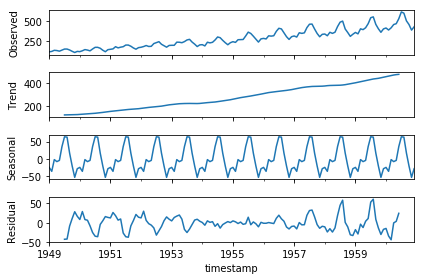

In [176]:
_=decomposition.plot()

### Also multiplicative model

$y=\text{Trend} * \text{Seasonal} * \text{Residual}$

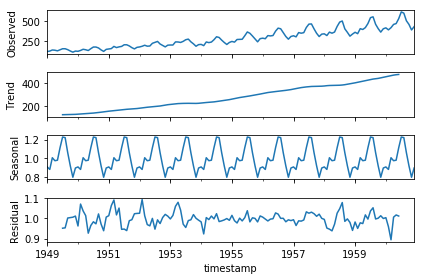

In [177]:
decomposition = seasonal_decompose(airline['Passengers'], model='multiplicative')
_=decomposition.plot()

# Additional visualisation for time series data

"__A Tour through the Visualization Zoo__", Jeffrey Heer, Michael Bostock, Vadim Ogievetsky. Communications of the ACM, 53(6), pp. 59-67, 2010

[Paper](https://idl.cs.washington.edu/files/2012-VisualizationZoo-CACM.pdf)

[Article in ACM Queue](https://queue.acm.org/detail.cfm?id=1805128)

### Stacked timeseries

For data that can be summed, usually percentile data.

![Stacked](https://homes.cs.washington.edu/~jheer//files/zoo/stacked_graph.png)

# Multi-variate data

Main goal here is to inspect the relations within the data:
* are any of the variables correlated?
* are the values clustered in any ways?

Main problem is __dimensionality reduction__.

In [178]:
iris_data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [179]:
corrplot = iris_data.corr()
corrplot.style.background_gradient(cmap='BrBG')

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1


## Visualising high dimensional data

### 2 dimensions: scatter plot

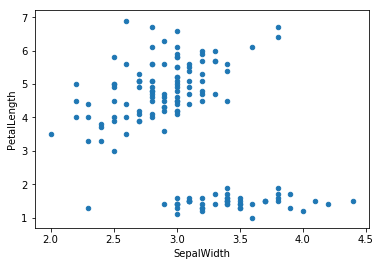

In [180]:
iris_data.plot.scatter('SepalWidth', 'PetalLength')

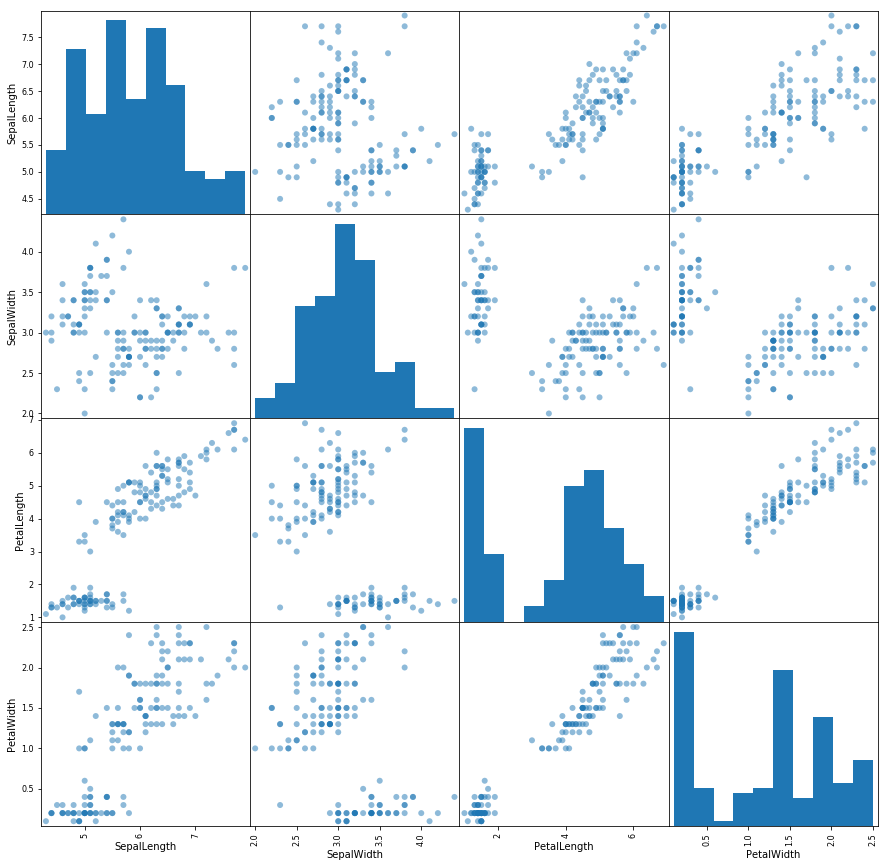

In [181]:
_=pd.plotting.scatter_matrix(iris_data, alpha=0.5, diagonal='hist', figsize=(15,15), marker='O')

### 3 dimensions: bubble plot

* two of the three dimensions are used to generate a scatter plot
* the third dimension is represented as the radius of the scatter plot markers
* therefore, each marker in the scatter plot becomes a "bubble"

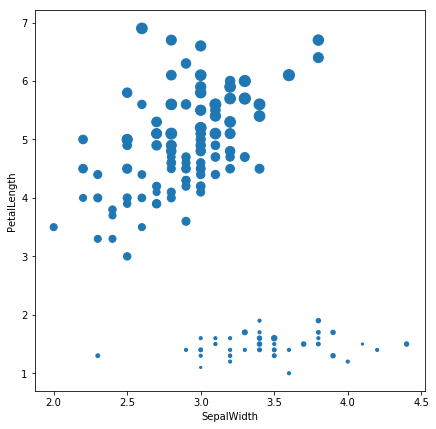

In [182]:
iris_data.plot.scatter(x='SepalWidth', y='PetalLength', s=iris_data['PetalWidth']*50, figsize=(7,7))

### Still more?

* 4 dimensions: add colour
* 5 dimensions: add animation?

[Source](https://www.juiceanalytics.com/writing/writing/parallel-coordinates)

### Alternative: parallel coordinates

* each dimension becomes an additional y-axis on the plot
* each data point becomes a polyline with segments connecting the dimension lines

Useful for identifying
* relations between dimensions
* clustering of data

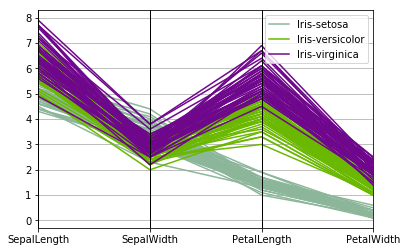

In [183]:
pd.plotting.parallel_coordinates(iris_data, class_column="Name")

The issue with parallel coordinates is that it can become crowded as the number of dimensions increase.

It's also best visualised in an interactive environment so that data points can be isolated to show relations between dimensions.

## More robust approaches

### Distance based 

* calculate distance between data points, commonly Euclidian distance
* minimise the difference between the distance in the high-dimensional space and that in the low-dimensional space
* k-means Clustering
    * break the data into clusters such that variance within the cluster is minimised
    * distance between data points is Euclidian

### Principal Component Analysis

* represent the data using a set of orthogonal components
* the orthogonal components are the eigenvectors of the covariance matrix
* the purpose of PCA is to explain the variance in the data
* dimensionality reduction can be achieved by selecting only the most important components.

### t-SNE: t-distributed Stochastic Neighbour Embeddings

* goal is to __embed__ a set of high-dimensional data points into 2D
* based on probability distribution in the high and low-dimensional spaces, tries to maintain distance between points
* the results are heavily influenced by the parameters
    * __perplexity__ measures the accuracy of a probability distribution's prediction of a sample
    * number of steps
* the algorithm is non-deterministic, may result in different outcomes for the same input parameters
* requires experience to properly interpret the outcome: [https://distill.pub/2016/misread-tsne/].

### UMAP: Uniform Manifold Approximation and Projection for dimension reduction

* works with Riemannian geometry
* assumes that the data is distributed over a Riemannian manifold
* [How it works][https://umap-learn.readthedocs.io/en/latest/how_umap_works.html]

t-SNE is quite dated at the moment and has several drawbacks. UMAP seems to surpass t-SNE:
* [Comparing t-SNE and UMAP][https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668]


Further reading:
[Good summary of dimensionality reduction and clustering]
http://colah.github.io/posts/2014-10-Visualizing-MNIST/

[Interactive introduction to dimensionality reduction]https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/

# The _Art_ of data visualization

[The visualization zoo]https://homes.cs.washington.edu/~jheer//files/zoo/

[Visualization for Machine Learning]https://media.neurips.cc/Conferences/NIPS2018/Slides/Visualization_for_ML.pdf

[Interactive plots with D3.js]https://d3js.org/

[Interactive plots with Protovis (defunct)]http://mbostock.github.io/protovis/ex/

# Visualization to understand neural networks

[Deep visualization]http://yosinski.com/deepvis

[drawNet]http://brainmodels.csail.mit.edu/dnn/drawCNN/

[Google Deep Dream]https://github.com/google/deepdream